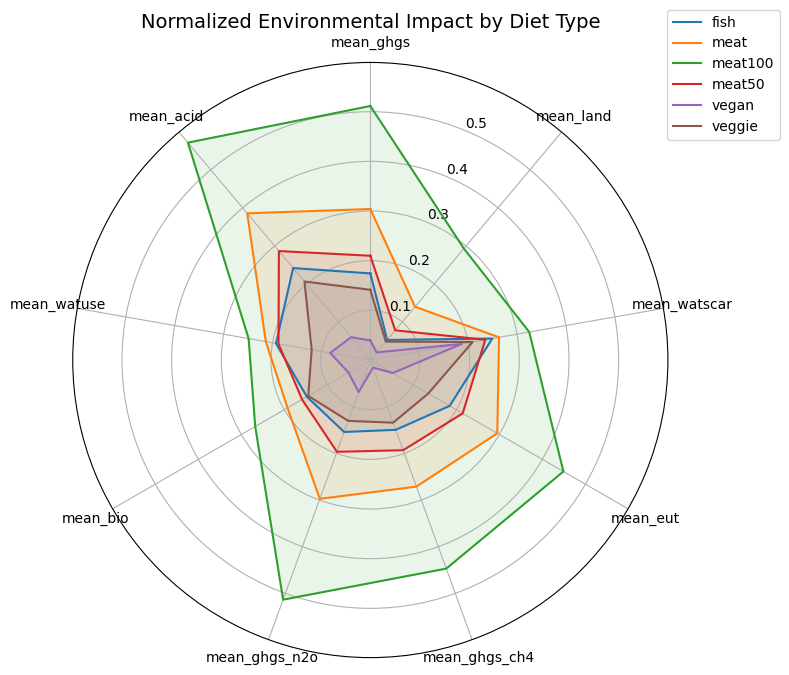

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 创建一个副本以避免原数据被修改
data = pd.read_csv("C:/Users/11193/Desktop/paid/report_0424/Results_21Mar2022.csv").copy()

# 环境指标列表
env_vars = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 
            'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 
            'mean_watuse', 'mean_acid']

# 对环境指标归一化处理（方便综合比较）
for var in env_vars:
    data[f'norm_{var}'] = (data[var] - data[var].min()) / (data[var].max() - data[var].min())

# 计算每个饮食类型在各环境维度上的均值（做一个雷达图）
grouped = data.groupby('diet_group')[[f'norm_{var}' for var in env_vars]].mean()

# 为雷达图准备数据
labels = env_vars
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制每个饮食类型
for index, row in grouped.iterrows():
    values = row.tolist()
    values += values[:1]  # 闭合雷达图线条
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.1)

# 添加标签
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Normalized Environmental Impact by Diet Type", fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


### **Visual Design Description Template**

- **● Image:**  
  ![Normalized Environmental Impact by Diet Type](attachment)

- **● Visual Design Type:**  
  Radar Chart (Spider/Web Chart) Comparing Normalized Environmental Impacts by Diet Type

- **● Name of Tool:**  
  Python (Libraries: `pandas`, `matplotlib`, `seaborn`, `numpy`)

- **● Diet Groups:**  
  - `fish`  
  - `meat50`  
  - `meat100`  
  - `meat`  
  - `vegan`  
  - `veggie`

- **● Variables:**  
  - **Environmental Impact Variables:**
    - `mean_ghgs` (greenhouse gas emissions)
    - `mean_land` (land use)
    - `mean_watscar` (water scarcity)
    - `mean_eut` (eutrophication)
    - `mean_ghgs_ch4` (methane emissions)
    - `mean_ghgs_n2o` (nitrous oxide emissions)
    - `mean_bio` (biodiversity impact)
    - `mean_watuse` (water use)
    - `mean_acid` (acidification potential)

  These variables were normalized to a range between 0 and 1 to make them comparable across different environmental dimensions and dietary patterns.

- **● Visual Mappings:**

  | Visual Element | Data Mapping |
  |----------------|--------------|
  | Axes (spokes) | Each axis represents one environmental variable. |
  | Radius | The normalized values for each environmental metric, ranging from 0 to 1 (normalized to maximum and minimum values). |
  | Color (lines and fill) | Each **diet group** is represented by a different color for easy comparison (e.g., fish, meat50, meat100, meat, vegan, veggie). |
  | Shape | The chart uses polygonal lines to connect values for each diet group. The area inside the polygon is filled with a transparent color to visualize the overall footprint. |
  | Legend | The legend at the top right corresponds to the colors representing each diet group, making it easier to identify each group in the chart. |
  | Title | The title clearly indicates that the chart shows **Normalized Environmental Impact by Diet Type**. |

- **● Unique Observation:**

  - From this radar chart, it is evident that **meat100** (red) has the highest normalized environmental impacts across most axes, particularly for **land use**, **water use**, and **greenhouse gases**.
  - **Vegan** (purple) and **Veggie** (brown) diets stand out with consistently lower normalized impacts across all axes, particularly in **land use**, **water use**, and **greenhouse gases**, indicating their sustainability.
  - **Fish** (blue) has a balanced environmental impact, lower than meat-based diets but higher than plant-based diets in areas like **water use** and **greenhouse gases**.
  - **Meat50** (green) shows a moderate environmental impact, lying between **meat100** and **vegan**/**veggie** diets.
  
  The **shape and area of each polygon** represent the **total environmental impact** of each diet type, and the **close-to-center positions** of vegan and veggie diets demonstrate their lower environmental footprint.

- **● Data Preparation:**

  - **Normalization**: Each environmental variable (`mean_ghgs`, `mean_land`, etc.) was normalized to a 0-1 scale by subtracting the minimum value and dividing by the range (max - min).
  - **Grouping**: The data was grouped by the diet group (`diet_group`), and the mean normalized values for each environmental variable were calculated.
  - **Radar Chart Setup**: The chart was created using polar coordinates, with each axis representing one of the environmental variables.

- **● (Optional) URL to screen-capture demo:**  
  _You can add a video link here showing mouseover or interaction if this were in an interactive dashboard format._

- **● (Optional) URL to source code:**  
  _You can upload your `.ipynb` or `.py` script to [GitHub](https://github.com) or [GitLab](https://gitlab.com) and link it here._


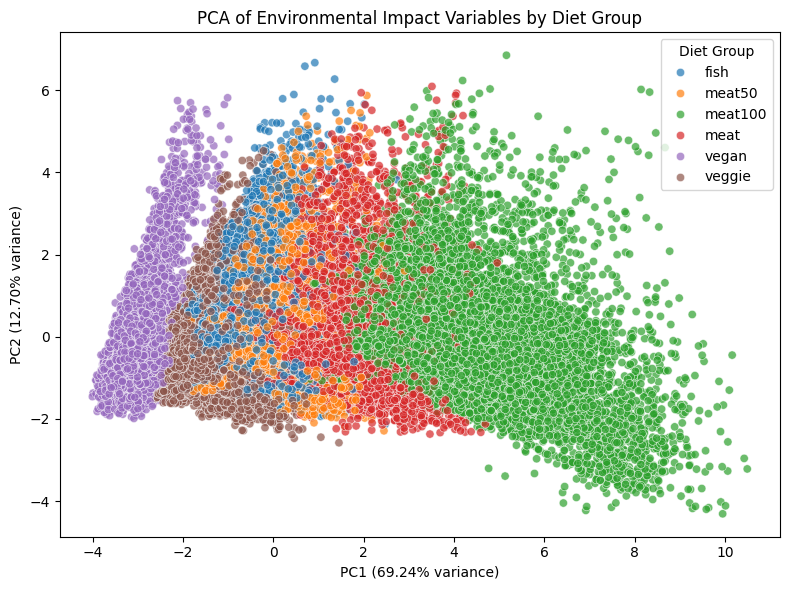

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 加载数据
data = pd.read_csv("C:/Users/11193/Desktop/paid/report_0424/Results_21Mar2022.csv").copy()


# 提取环境指标与饮食组
env_vars = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut',
            'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio',
            'mean_watuse', 'mean_acid']
df_env = data[env_vars]
diet_group = data['diet_group']

# 标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_env)

# PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 合并结果用于可视化
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["diet_group"] = diet_group

# 可视化：PCA图 + 饮食类型颜色
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="diet_group", alpha=0.7)
plt.title("PCA of Environmental Impact Variables by Diet Group")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(title="Diet Group")
plt.tight_layout()
plt.show()


### **Visual Design Description Template**

- **Image:**  
  ![PCA of Environmental Impact Variables by Diet Group](attachment)

- **Visual Design Type:**  
  PCA (Principal Component Analysis) Scatter Plot of Environmental Impact Variables by Diet Group

- **Name of Tool:**  
  Python (Libraries: `pandas`, `scikit-learn`, `matplotlib`, `seaborn`)

- **Diet Groups:**  
  - `fish`  
  - `meat50`  
  - `meat100`  
  - `meat`  
  - `vegan`  
  - `veggie`

- **Variables:**  
  - **Environmental Impact Variables:**
    - `mean_ghgs`, `mean_land`, `mean_watscar`, `mean_eut` (eutrophication), `mean_ghgs_ch4`, `mean_ghgs_n2o` (greenhouse gases), `mean_bio`, `mean_watuse`, `mean_acid`
  
  These variables were chosen to represent the major environmental impacts associated with food consumption. They include greenhouse gas emissions, land and water use, and biodiversity impacts.

- **Visual Mappings:**

  | Visual Element | Data Mapping |
  |----------------|--------------|
  | X-axis (`PC1`) | 1st Principal Component (explains 69.24% of variance) |
  | Y-axis (`PC2`) | 2nd Principal Component (explains 12.70% of variance) |
  | Color | `diet_group` (indicates the dietary category of each data point) |
  | Shape | Uniform (circle markers, no shape differentiation) |
  | Size | Uniform size (dots have the same size, no variation) |
  | Hierarchy | No hierarchy is depicted; each diet group is treated equally in terms of visual representation |

- **Unique Observation:**

  - From the plot, we can observe that different **diet groups** have distinct patterns of **environmental impacts**:
    - The **veggie** (purple) and **vegan** (pink) groups are concentrated on the left side of the graph, with **vegan** showing a more compact distribution.
    - The **meat** (green) and **meat50** (orange) groups have a wider spread across both PC1 and PC2, indicating more variability in their environmental impacts.
    - The **meat100** (red) group is positioned towards the right, exhibiting higher values along the first principal component (PC1), indicating a higher environmental impact.
    - The **fish** (blue) group overlaps with some of the other groups, suggesting intermediate environmental impact characteristics.
  
  The clear separation between plant-based diets (vegan, veggie) and meat-based diets (meat100, meat50) is easily visible, indicating distinct environmental footprints associated with different dietary patterns.

- **Data Preparation:**

  - Data was cleaned and only relevant columns (`mean_ghgs`, `mean_land`, `mean_watscar`, etc.) were selected for PCA.
  - Missing values were handled and not present in the dataset for the selected columns.
  - The environmental variables were **standardized** using `StandardScaler` to ensure that they have the same scale, making PCA effective.
  - PCA was applied to reduce the dimensionality from 9 environmental variables to 2 principal components.
  - The PCA-transformed data, along with the corresponding **diet group labels**, were merged into a new DataFrame for visualization.

- **(Optional) URL to screen-capture demo:**  
  _You can add a video link here showing mouseover or interaction if this were in an interactive dashboard format._

- **(Optional) URL to source code:**  
  _You can upload your `.ipynb` or `.py` script to [GitHub](https://github.com) or [GitLab](https://gitlab.com) and link it here._


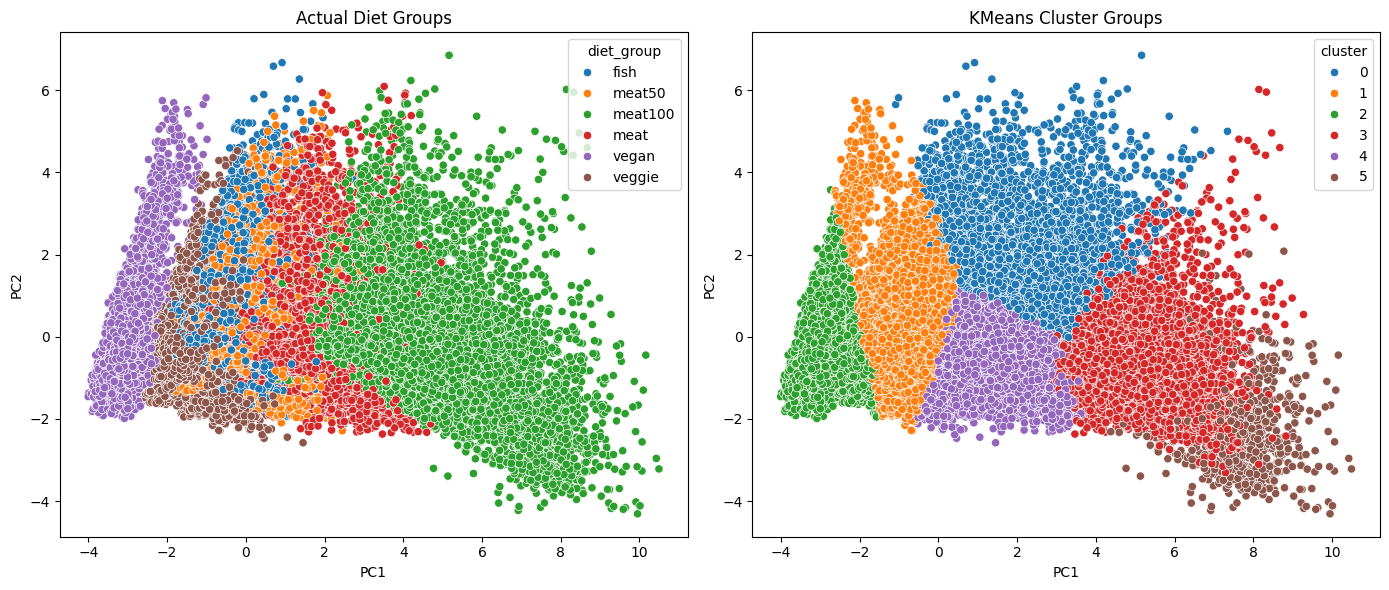

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 加载数据
file_path = r"C:\\Users\\11193\\Desktop\\paid\\report_0424\\Results_21Mar2022.csv"
df = pd.read_csv(file_path)

# 清理数据
df = df.dropna(subset=['diet_group'])

# 环境变量选择
env_vars = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut',
            'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio',
            'mean_watuse', 'mean_acid']
X = df[env_vars].dropna()
df = df.loc[X.index]  # 保持一致

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = df['diet_group'].nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# PCA 可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="diet_group", ax=axes[0])
axes[0].set_title("Actual Diet Groups")

sns.scatterplot(data=df, x="PC1", y="PC2", hue="cluster", ax=axes[1], palette="tab10")
axes[1].set_title("KMeans Cluster Groups")

plt.tight_layout()
plt.show()



### **Visual Design Description Template**

- **Image:**  
  ![Your Provided Visualization](attachment)

- **Visual Design Type:**  
  Comparative Scatter Plot with PCA Dimensionality Reduction (Dual Panel)

- **Name of Tool:**  
  Python (Libraries: `pandas`, `scikit-learn`, `matplotlib`, `seaborn`)

- **Diet Groups:**  
  - `fish`  
  - `meat50`  
  - `meat100`  
  - `meat`  
  - `vegan`  
  - `veggie`

- **Variables:**  
  Environmental impact metrics:
  - `mean_ghgs`, `mean_land`, `mean_watscar`, `mean_eut` (eutrophication)
  - `mean_ghgs_ch4`, `mean_ghgs_n2o` (greenhouse gases)
  - `mean_bio`, `mean_watuse`, `mean_acid`

  > These variables were chosen to reflect diverse environmental impacts related to food consumption, and PCA was used to reduce dimensionality to 2D for visualization.

- **Visual Mappings:**

  | Visual Element | Data Mapping |
  |----------------|--------------|
  | X-axis (`PC1`) | 1st Principal Component (from PCA on 9 environmental variables) |
  | Y-axis (`PC2`) | 2nd Principal Component |
  | Color (left plot) | Actual `diet_group` |
  | Color (right plot) | Assigned `cluster` by KMeans (0–5) |
  | Shape | Uniform (dots only), no shape variation |
  | Size | Uniform dot size |
  | Hierarchy | No hierarchy used |

- **Unique Observation:**

  From this visualization, we observe:

  - **Cluster 4** (purple in right plot) aligns closely with the **vegan group** in the left plot (same region on PC1 and PC2 axes), showing strong clustering correspondence.
  - **Cluster 2** (green) largely overlaps with **meat100**, indicating strong environmental impact patterns unique to heavy meat consumers.
  - Some groups (e.g., **fish**, **meat50**) are more dispersed and intermingled across clusters, revealing overlapping environmental profiles.
  
  These patterns are visible through the **shape and density of color-coded point clouds** in each panel. The **left panel** shows ground truth labels, while the **right panel** reveals how well unsupervised clustering matches them.

- **Data Preparation:**

  - Dropped rows with missing `diet_group`
  - Selected 9 key environmental variables
  - Standardized features using `StandardScaler`
  - Applied PCA for dimensionality reduction to 2D
  - Performed KMeans clustering (`k=6`, based on number of diet groups)
  - Merged PCA results and clustering labels into the original DataFrame for plotting

- **(Optional) URL to screen-capture demo:**  
  _You can add a video link here showing mouseover or interaction if this were in an interactive dashboard format._

- **(Optional) URL to source code:**  
  _You can upload your `.ipynb` or `.py` script to [GitHub](https://github.com) or [GitLab](https://gitlab.com) and link it here._


In [7]:
# 重新加载数据，因为代码状态被重置
import pandas as pd

# 加载数据
df = pd.read_csv("C:/Users/11193/Desktop/paid/report_0424/Results_21Mar2022.csv").copy()


# 环境变量列表
env_vars = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut',
            'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio',
            'mean_watuse', 'mean_acid']

# 进行 ANOVA 分析
from scipy.stats import f_oneway

anova_results = {}

# 对每个环境变量做单因素方差分析（饮食组为因子）
for var in env_vars:
    groups = [group[var].values for name, group in df.groupby('diet_group')]
    f_stat, p_val = f_oneway(*groups)
    anova_results[var] = p_val

# 转换为 DataFrame 并排序
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
anova_df.sort_values('p_value', inplace=True)

# 展示表格
import ace_tools as tools; tools.display_dataframe_to_user(name="ANOVA Results by Diet Group", dataframe=anova_df)

# 可视化最显著的前4个变量
import matplotlib.pyplot as plt
import seaborn as sns

top_vars = anova_df.head(4).index.tolist()
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(top_vars):
    sns.boxplot(data=df, x='diet_group', y=var, ax=axes[i])
    axes[i].set_title(f'{var} by Diet Group')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'ace_tools'